In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#importe la librerias pandas como pd
import pandas as pd
#importe ZipFile de la libreria zipfile
from zipfile import ZipFile
# Importar directorios de archivos
import os

# Llamamos a la funcion para importar directorio
os.listdir()

['.config', 'test.csv', 'train.csv', 'drive', 'sample_data']

In [65]:
# funcion utilitaria para extraer data
def unzip_data(path):
    with ZipFile(path, 'r') as zipObj:
        zipObj.extractall()

In [66]:
#Llamamos la funcion unzip_data('Ruta del objeto') Recordar aplicar diagonales dobles
unzip_data('/content/drive/MyDrive/Inteligencia artificial/Tarea 2 Titanic Modelado/spaceship-titanic.zip')

In [67]:
# Lectura de los archivos CSV utilizando read_csv de pandas
train_ds = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/Tarea 2 Titanic Modelado/train.csv')
test_ds = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/Tarea 2 Titanic Modelado/test.csv')

In [68]:
# Realizamos la lectura de las primeras 5 lineas del archivo Training
# Nombre de la variable leida.head "Funcion" ("Argumento que es el numero de filas")
train_ds.head(5)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [69]:
# Realizamos la lectura de las primeras 5 lineas del archivo test o prueba
test_ds.head(5)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [70]:
# calcule la cantidad de filas del training set y del test set
# Para los claculos de Cantidad de filas se utiliza la funcion Lens("Argumento", Variable a leer)
ntrain = len(train_ds)
ntest = len(test_ds)

#imprima la cantidad de datos del training set y del test set
print(f'Dataset has {ntrain} train samples')
print(f'Dataset has {ntest} test samples')

Dataset has 8693 train samples
Dataset has 4277 test samples


In [71]:
# con info() la sintaxis: Variable a lee.info()
# Verificar los tipos de columna en el DataFrame train_ds
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [73]:
# Verificar si existen campos nulos en el conjunto de entrenamiento (train_ds)
# Sintaxis: Crear una varible = variable leida.insnull().sum()

NullTrainset = train_ds.isnull().sum()

# Imprimir la cantidad de campos nulos por columna en el conjunto de entrenamiento
# Es necesario que utilizemos la funcion print para conocer los datos
print("Campos nulos en el conjunto de entrenamiento:")
print(NullTrainset)


Campos nulos en el conjunto de entrenamiento:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


Debido a que en analisis de datos no se pueden tener datos nulos, ya que causarian problemas en el analisis, es recomendable reemplazar esos datos nulos por otro tipo de datos.

Una estrategia es utilizar una funcion de Imputacion, lo que hara es analizar el dato mas frecuente en el comportamiento y escogera uno para reemplazarlo en los datos nulos, teniendo asi datos mas consistentes.

In [74]:
# Declaramos la funcion de reemplazos de daots en la columna(imputer), imputer es la columna a la cual se le asigna el llamado
def impute_most_frequent_data(df):
    for column_name in df.columns:
        data = df[column_name].value_counts().index[0]
        df[column_name].fillna(data, inplace=True)
    return df

In [75]:
# Actualizamos los datos de la variable Train ds aplicando la operacion de la funcion
# para llamar a la funcion :  Nombre de la funcion (Variable a trabajar)
train_ds = impute_most_frequent_data(train_ds)

# Mostramos los datos actualizados
train_ds.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [76]:
# Para saber con certeza debemos validar si existe presencia de nulos

# Verificar si existen campos nulos en el conjunto de entrenamiento (train_ds)
NullTrainset = train_ds.isnull().sum()

# Imprimir la cantidad de campos nulos por columna en el conjunto de entrenamiento
print("Campos nulos en el conjunto de entrenamiento:")
print(NullTrainset)

Campos nulos en el conjunto de entrenamiento:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [77]:
# Agrupar la columna "Home planet" y "Vip"  realizamos la suma de los datos para saber la frecuencia
# Agrupe por planeta y adquiera la columna VIP

# Creamos la variable de reemplazo "Home_Planet_vs_Vip"
# para ello "Dataset".groupby "Funcion" ("Columna 1")["Columna 2"].sum*(), se colocaria el nombre las columnas a sumar

home_planet_vs_vip = train_ds.groupby('HomePlanet')['VIP'].sum()
home_planet_vs_vip

HomePlanet
Earth       5
Europa    131
Mars       63
Name: VIP, dtype: int64

<ipython-input-78-60a5a8cbeba5>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(home_planet_vs_vip.index, rotation=45)


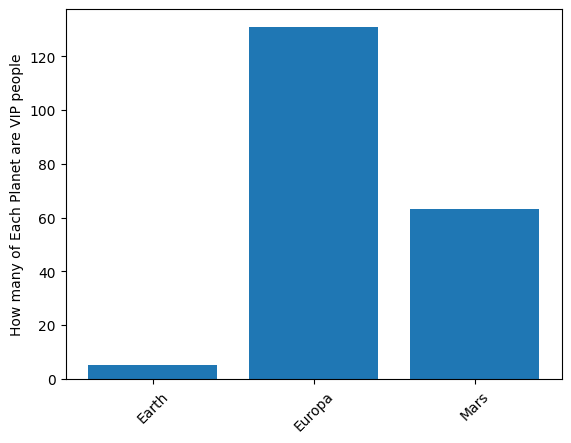

In [78]:
# Genere un grafico de barras donde
# x = 'HomePlanet'
# y = cantidade de personas que fueron VIP
# rote los labels a 45°

# Se importa matplolib porque es necesario graficar
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax.bar(Eje de las x "Clases", Eje de las y "Amplitud") | Bar = Tipo de grafica
# Setx_xticklabels "Que se utiliza para indicar las clases en texto", "Rotacion de esos textos"

ax.bar(home_planet_vs_vip.index, home_planet_vs_vip)
ax.set_xticklabels(home_planet_vs_vip.index, rotation=45)
ax.set_ylabel("How many of Each Planet are VIP people")
plt.show()

In [79]:
# Agrupar por edad y sumar el gasto en cada grupo | se pueden utilizar caracteres multiples
age_vs_moneyspent = train_ds.groupby('Age')['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].sum()
age_vs_moneyspent

<ipython-input-79-b4b53ec7bd63>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_vs_moneyspent = train_ds.groupby('Age')['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].sum()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,,,,,
0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
75.0,0.0,493.0,1224.0,131.0,1901.0
76.0,0.0,2732.0,422.0,16594.0,330.0
77.0,0.0,9032.0,131.0,4109.0,1572.0


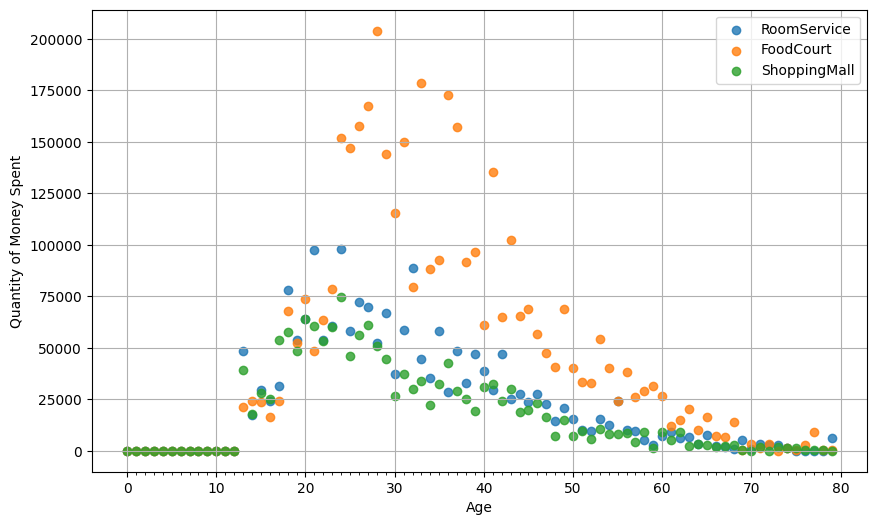

In [81]:
# Realize un gráfico de dispersion para ver la cantidad gastada por rango de edades

fig, ax = plt.subplots(figsize=(10,6))

# Creamos un ciclo for para analizar los distintos datos basados en columnas
# Establecemos las dimension de ax.scatter(x,y, etiquetas)
# Establecemos las leyendas del grafico

for i in range(len(age_vs_moneyspent.columns)-2):
    ax.scatter(age_vs_moneyspent.index,  age_vs_moneyspent.iloc[:, i], alpha=0.8)
    ax.legend(age_vs_moneyspent.columns)
ax.set_xlabel("Age")
ax.set_xticks(ticks=range(0,80), minor=True)
ax.set_ylabel("Quantity of Money Spent")
ax.grid()

plt.show()

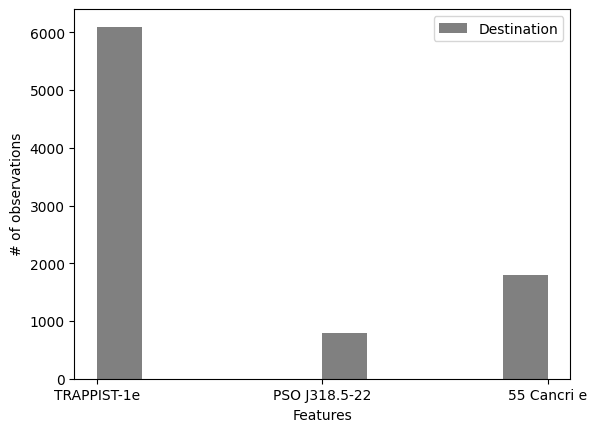

In [82]:
# realice un grafico de histograma para los destinos versus las características

# Los graficos de histogramas muestran el valor de comportamiento de una variable
# declaramos un histograma utilizando ax.hist("valor analizado, nombre de la variable["Carateristica, titulo de columna"], Titulo de la columna de etiquetas, color del grafico")
fig, ax = plt.subplots()
ax.hist(train_ds['Destination'], label="Destination", color='gray')
ax.set_xlabel("Features") # Eiquetas en el eje de las X
ax.set_ylabel("# of observations") # Etiquetas en el eje de las y
ax.legend()
plt.show()

Diseñamos un equema con los datos para crear un modelo de Machine learning sencillo, para ello preparamos los datos y transformamos la informacion numerica clasificandola, es importante tomar en cuenta que los modelos de machine learning utilizan datos numericos o boleanos para realizar los algoritmos.

In [83]:
# Importamos una libreria de sklearn para establecer el algoritmo del modelo
from sklearn.preprocessing import OneHotEncoder

# Utilizando una funcion de encoding de columnas Aplicamos la funcion al training set
# Listando las librerias Homeplanet y Destination

def column_transform(df, categorical_columns):
    for col in categorical_columns:
        col_ohe = pd.get_dummies(df[col], prefix=col)
        df = pd.concat((df, col_ohe), axis=1).drop(col, axis=1)
    return df

In [84]:
# Realizamos la transformacion de la columnas de encoding
train_ds_ohe = column_transform(df=train_ds, categorical_columns=['HomePlanet', 'Destination'])
train_ds_ohe.head()


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,0,1
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1


In [85]:
# Asingamos la categorias para las variables "X" y el bojectivo a encontrar en la variable "Y", en este caso las personas

# deshagase con drop() de las columnas 'PassengerId', 'Cabin', 'Name' y 'Transported'
# asignela a la variable X
X = train_ds_ohe.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)

# asigne del train_ds_ohe solamente la columna transported a la variable y
y = train_ds_ohe['Transported']


In [86]:
# de sklearn linear_model importe SGDClassifier
from sklearn.linear_model import SGDClassifier
# de sklearn preprocessing importe StandardScaler y make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [87]:
# llame a make_pipeline con:
# StandardScaler()
# SGDClassifier con max_iter=1000, tol=1e-3
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [88]:
# funcion para preprocesar la data antes de realizar predicciones, note que no hacemos escalamientos
def preprocess_test_set(test_df):
    test_df = column_transform(df=test_df, categorical_columns=['HomePlanet','Destination'])
    test_df = test_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
    return impute_most_frequent_data(test_df)

In [89]:
# Llamar la función preprocess_test_set con el test dataset
test_data = preprocess_test_set(test_ds)

# Calcular las predicciones del clasificador con el método predict
y_pred = clf.predict(test_data)

# Transformar las predicciones en un DataFrame
predictions_df = pd.DataFrame({'Prediction': y_pred})

# Contar cuántas predicciones fueron pasajeros transportados y cuántas no fueron transportados
count = predictions_df['Prediction'].value_counts()

# Imprimir los resultados
print(count)



False    2238
True     2039
Name: Prediction, dtype: int64
